### Abalone Case Study

##### Introduction:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

##### Problem Statement:

We need to predict the rings of each abalone which will lead us to the age of that abalone. The age of the abalone is number of rings + 1.5 years.

#### Importing the required Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#### Loading the DataSet

In [4]:
df = pd.read_csv('abalone.csv')

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Checking the data shape.

df.shape

(4177, 9)

As per our observation, there are 4177 rows and 9 columns in the dataset including the target column. 

In [5]:
# Checking for the top five values of the dataset.

df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# Checking if their is any null value in our dataset.

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

As per the observation, there is no null value present in the dataset.

In [7]:
# Checking the features (Coulmns) of the dataset.

df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

#### About the columns:

1. Sex: Male (M), Female (F), and Infant (I).

2. Length: Longest shell measurement (in mm).

3. Diameter: Perpendicular to length (in mm).

4. Height: with meat in shell (in mm).

5. Whole Weight: whole abalone (in grams).

6. Shucked Weight: weight of meat (in grams).

7. Viscera weight: gut weight (after bleeding) (in grams).

8. Shell weight: after being dried (in grams).

9. Rings: +1.5 gives the age in years.

- Rings is our target column.

In [8]:
# Checking the info of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
# Checking the datatypes of the dataset
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

So, as per the information of the dataset we've total 7 float type, 1 object type, and 1 integer type attributes.

In [10]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [11]:
# Checking for numerical features.

nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
# Checking for categorical features.

cf

Index(['Sex'], dtype='object')

In [12]:
# Label encoding the the categorical data

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [13]:
#Checkig the dataset after labelencoding.

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# Stastical Summary

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Insights from the dataset:

- There is no null value in the dataset.

- All the features in our datast have numerical values except 'sex'.

- Each feature has different scale range.

#### Analysing the Target Column

In [61]:
print ('Value count of Rings column \n', df.Rings.value_counts(), '\n Percentage of Rings Column \n', df.Rings.value_counts(normalize=True))

Value count of Rings column 
 9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64 
 Percentage of Rings Column 
 9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


In [62]:
'Number of classes in the target column'

print(len(df.Rings.unique()))

28


There are total 28 classes in the dataset

##### Checking the count of Sex of the abalone. 2 - Males, 1 - Females and 0 - Infant

<AxesSubplot:xlabel='Sex', ylabel='count'>

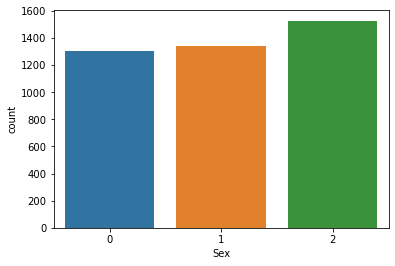

In [64]:
sns.countplot(x = 'Sex', data=df)

In [65]:
# Printing the values in numbers and percentage.

print ('Sex count in numbers \n', df.Sex.value_counts())
print ('Sex count in percentage \n', df.Sex.value_counts(normalize=True))

Sex count in numbers 
 2    1528
1    1342
0    1307
Name: Sex, dtype: int64
Sex count in percentage 
 2    0.365813
1    0.321283
0    0.312904
Name: Sex, dtype: float64


As per the outcome, there are 1528 Males, 1342 Females, and 1307 Infant abalone present in the dataset.

Calculating the 'Age' of the abalone from the Rings column (Age = (number of rings + 1.5) years) 

In [66]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

#### Checking Correlation

In [14]:
corr_mat = df.corr()

corr_mat

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### Plotting the heatmap for correlation

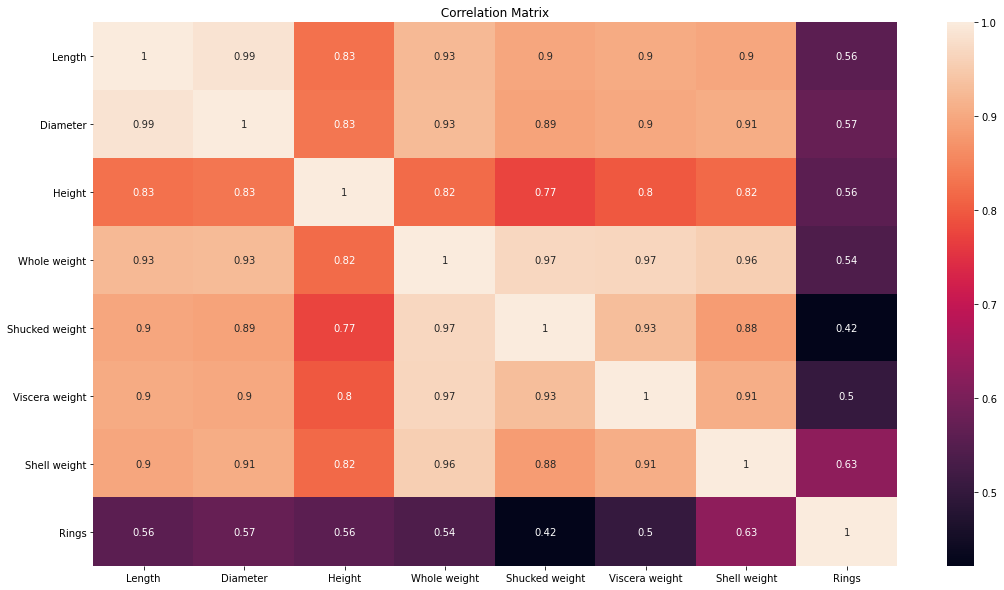

In [17]:
plt.figure(figsize=[18,10])
sns.heatmap(corr_mat,annot=True)
plt.title(' Correlation Matrix ')
plt.show()

#### Checking for the Skewness and outliers in the dataset

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

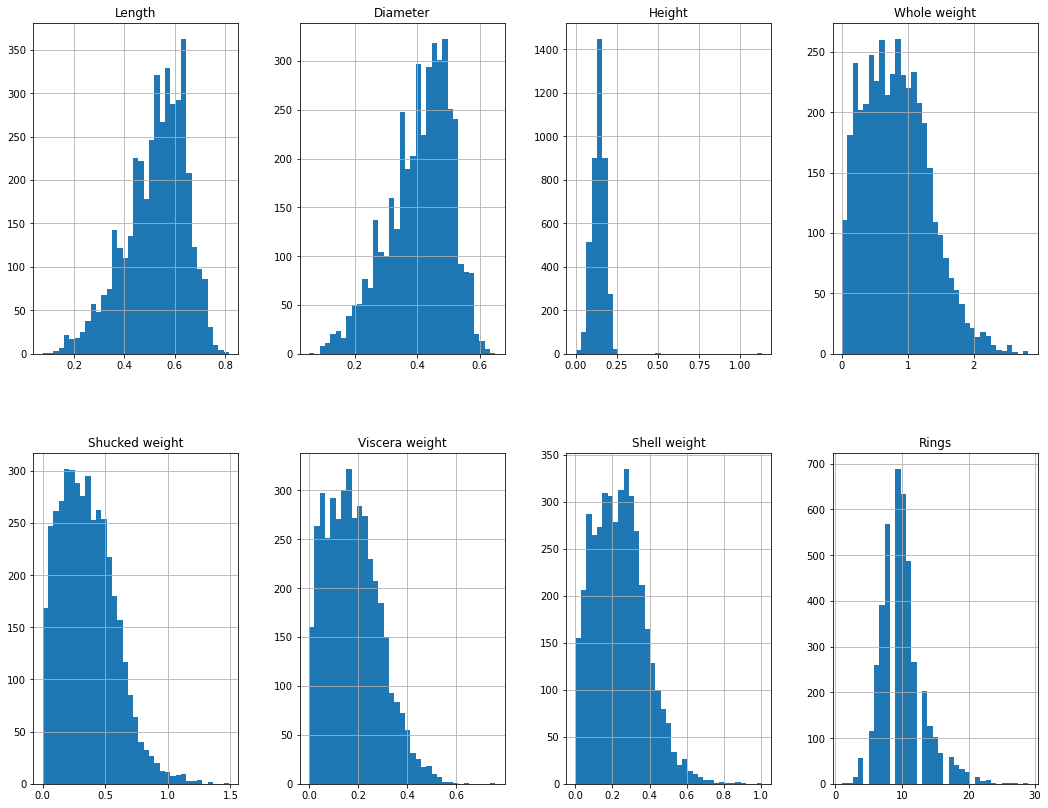

In [5]:
# We're plotting histogram to see the numerical distribution of the dataset.

df.hist(figsize=(18,14), grid = True, layout=(2,4), bins = 35)

The histogram shows that some of the values have skewness. Let's check further.

#### Now Looking for the Outliers in the dataset.

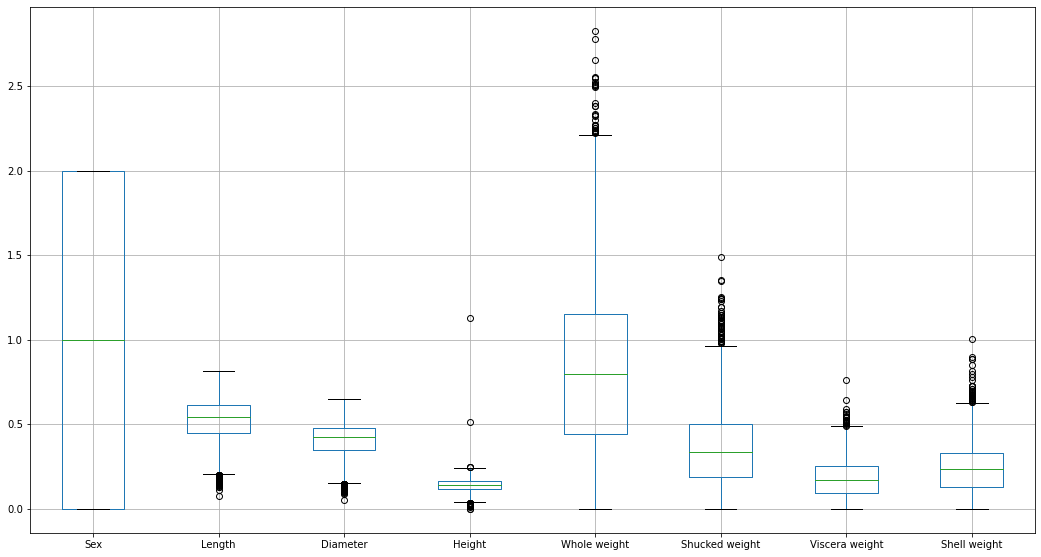

In [32]:
x.boxplot(figsize=[18,10])
plt.subplots_adjust(bottom = 0.15)
plt.show()

From the above outcome, we can say that:

- All the columns except 'Sex' column outliers are present.

#### Cleaning the dataset

Now, we'll try to remove the outliers from our dataset. For this we're using 'Z-Score' technique.

In [36]:
from scipy.stats import zscore

z = np.abs(zscore(df))

z.shape

(4177, 9)

In [34]:
threshold = 3

print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [51]:
df_new = pd.DataFrame(df[(z<3).all(axis=1)])
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


#### Calculating the percentage data loss.

In [52]:
loss_percentage = ((4177-4027)/4177)*100

loss_percentage

3.5910940866650707

we'll split the independent and target variables in 'x' and 'y'

In [74]:
x = df_new.drop(columns=['Rings'])
y = df_new['Rings']

In [77]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [78]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

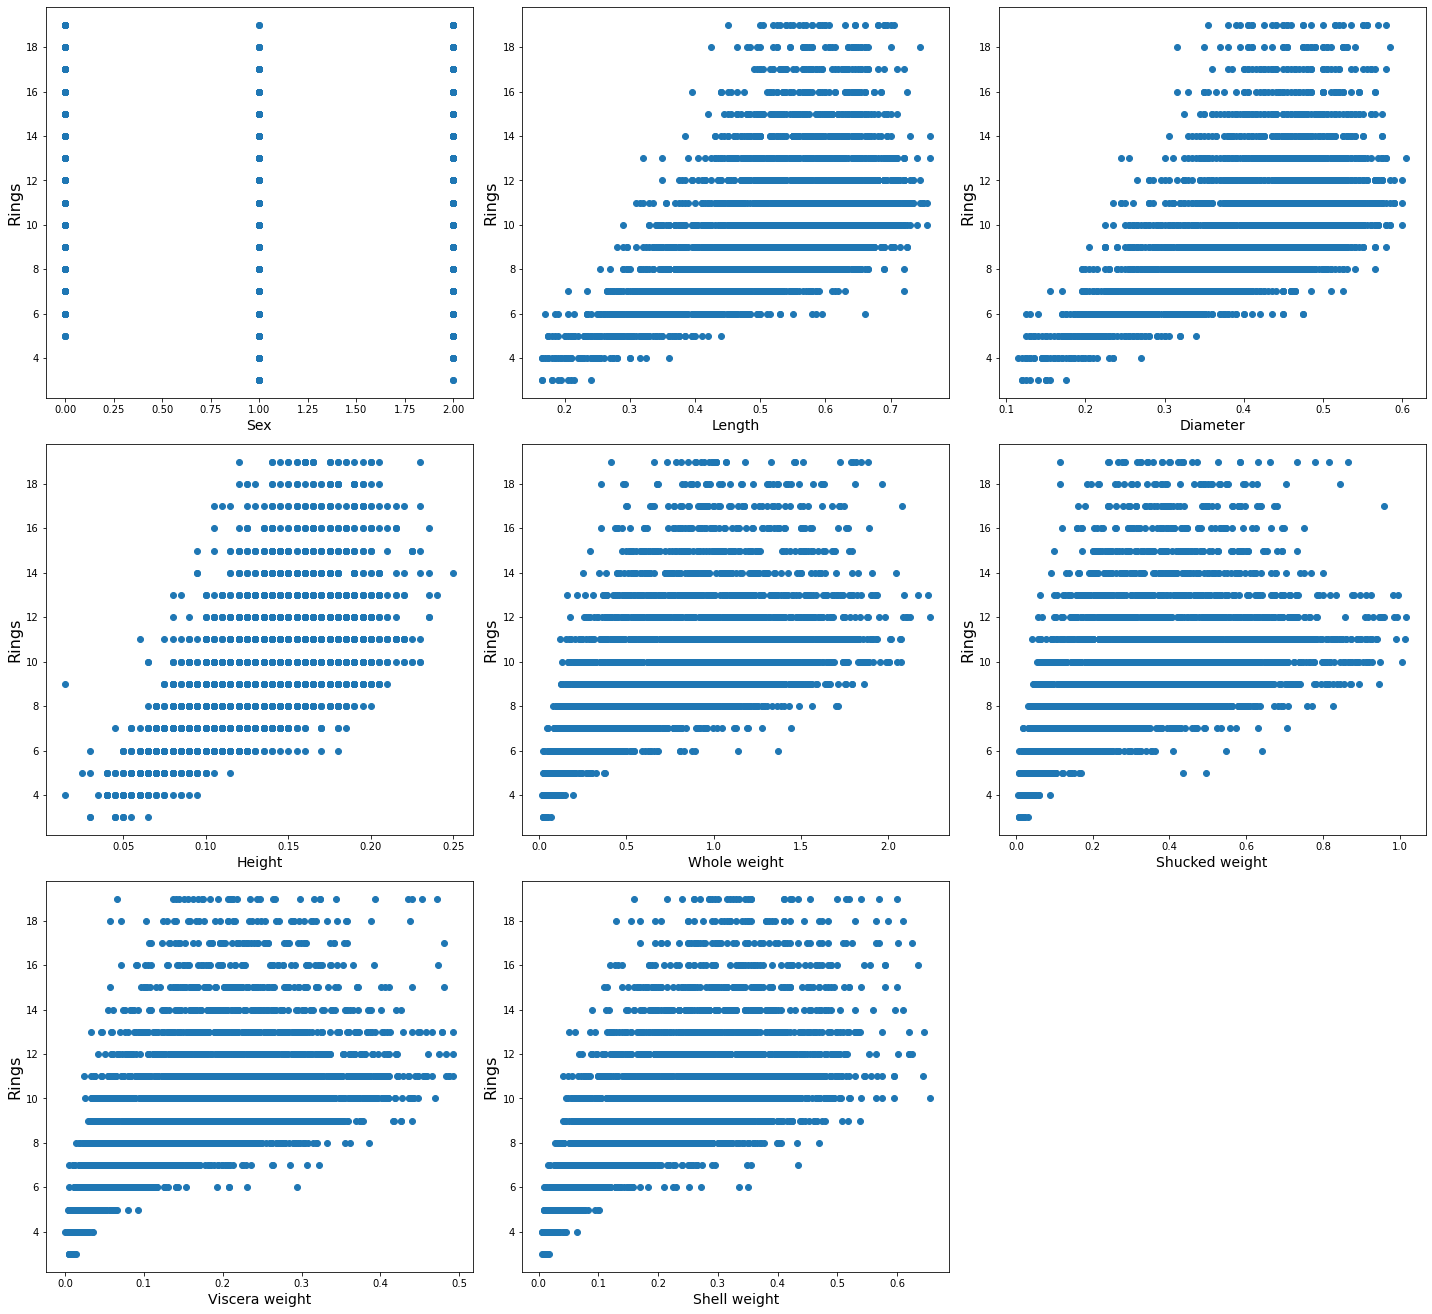

In [79]:
# Analysing/Vizualizing the relationship between indepent variables and dependent variables.
plt.figure(figsize=[20,30], facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=14)
        plt.ylabel('Rings', fontsize=16)
    plotnumber+=1
plt.tight_layout()


In [75]:
# Checking for the skewness for 'x' (dependent variable)

x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

As we know the feature having value greater than +0.5 and -0.5 is considered as skewness. So, as per the above outcome skewness is present in following columns:

- Length
- Diameter

- Column 'Length' have the maximum skewness and column 'Diameter' have the least skewness

We'll remove the skewness using power_transform function.

In [55]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method='yeo-johnson')

In [58]:
x = pd.DataFrame(x)

x.skew()

0   -0.174523
1   -0.082985
2   -0.080956
3   -0.015962
4   -0.016797
5    0.021815
6    0.035902
7    0.016660
dtype: float64

The above outcomes shows that we've removed skewness from the dataset.

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [148]:
# Splitting data into train and test. Model will be build on training data and tested on test data.

x_train,x_test, y_train, y_test = train_test_split(x, y, random_state=249, test_size=0.33)

In [149]:
x_train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2322,2,0.530,0.435,0.135,0.7365,0.3275,0.1315,0.220
1858,0,0.510,0.400,0.120,0.7005,0.3470,0.1105,0.195
2665,0,0.575,0.480,0.150,0.8970,0.4235,0.1905,0.248
1672,0,0.610,0.475,0.160,1.1155,0.3835,0.2230,0.379
2244,1,0.355,0.280,0.100,0.2275,0.0935,0.0455,0.085


In [150]:
y_train.head()

2322    12
1858    10
2665     8
1672    10
2244    11
Name: Rings, dtype: int64

#### Linear Regression method:

In [151]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Model is getting trained
lr.fit(x_train, y_train)
predit_train = lr.predict(x_train)
predit_test = lr.predict(x_test)

In [152]:
lr.score(x_train, y_train)

0.5097629001895714

In [153]:
# Let's check how the model fit in the test data.

lr.score(x_test,y_test)

0.5198065696721113

#### Multiclass Classification:

In [154]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear', C=1, gamma=1)

svm_model.fit(x_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [155]:
# Predicting the data 
y_pred = svm_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)

In [156]:
# Printing the accuracy value

acc

0.2588412340105342

In [158]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test,ad_pred))

0.2565838976674191
[[  0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  16   1   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  34   6   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  28  39   8  11   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0  17  48  26  25  18   1   0   0   0   0   0   0   0   0]
 [  0   0   0   4  19  59  60  44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   9  40  70 109  11   0   0   0   0   0   0   0   0]
 [  0   0   0   1   3  24  50 101  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   9  27  67  35   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3  18  47  14   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   4  13  34  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10  19   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   6  20   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   6  13   5   0   0   0   0   0 

C:\Users\Ajitesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajitesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ajitesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Dicision tree regressor

In [157]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
preddit = dt.predict(x_test)
print (accuracy_score(y_test, preddit))
print(confusion_matrix(y_test, preddit))
print (classification_report(y_test, preddit))

0.20466516177577126
[[ 1  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  7  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9 11 10  8  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 11 18 28 17  9  3  0  1  1  0  1  0  0  0  0]
 [ 1  0  7 27 26 30 20 10  5  2  2  2  3  0  0  0  0]
 [ 0  0  2  8 23 61 37 22 12 12  2  3  2  1  0  1  0]
 [ 0  0  0  1 24 37 54 42 31 23 14  3  4  1  0  5  0]
 [ 0  0  0  0  6 28 39 41 32 16 16  5  3  4  2  1  2]
 [ 0  0  0  1  2 10 34 25 29 16 14  4  1  1  1  3  0]
 [ 0  0  0  1  2  6 13 20 15 10  7  4  1  1  0  1  1]
 [ 0  0  0  2  1  3  6  7 10  5  9 10  3  3  1  2  1]
 [ 0  0  0  0  0  4  4  6  3  2  2  1  3  2  1  4  0]
 [ 0  0  0  0  0  2  5  5  3  2  4  3  2  2  1  3  1]
 [ 0  0  0  0  0  2  3  5  6  2  2  2  1  0  1  1  1]
 [ 0  0  0  0  0  1  1  2  2  4  1  2  0  0  3  2  1]
 [ 0  0  0  0  0  1  0  2  2  4  0  0  0  1  1  1  0]
 [ 0  0  0  0  0  1  1  2  2  0  2  0  0  1  1  0  1]]
              precision    recall  f1-score   support

      

### Saving the model

In [172]:
import pickle
filename = 'Abalonecasestudy.pkl'
pickle.dump(lr, open(filename, 'wb'))

### Conclusion:

In [175]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))

df_con = pd.DataFrame({'Original':a, 'Predicted':predicted}, index=range(len(a)))

df_con

,Original,Predicted
0,9,9.120723
1,10,14.858342
2,9,8.113239
3,10,10.268276
4,8,6.647041
...,...,...
1324,7,8.266775
1325,5,6.805964
1326,9,10.548334
1327,13,11.760570
